## Домашнее задание по ТеорВеру №1

### Выполнил Расторугев Михаил 5030102/30201

Обозначения:

    Зелёный цвет - хорды меньше длины стороны равностороннего треугольника, вписанного в окружность с R = 1.
    
    Фиолетовый цвет - хорды, не входящиие в первую группу.

In [39]:
import random
import math


def draw_chord(ax,x_cords,y_cords):
    
    col = 'green'
    if math.sqrt((x_cords[0] - x_cords[1])**2 +(y_cords[0] - y_cords[1])**2) > math.sqrt(3):
        col = 'purple'
    
    ax.plot(x_cords,y_cords,color=col)
    return col

def ex1(ax):
    random_t1 = random.uniform(0, 2 * math.pi)
    random_t2 = random.uniform(0, 2 * math.pi)
    
    x1,y1 = math.cos(random_t1), math.sin(random_t1)
    x2,y2 = math.cos(random_t2), math.sin(random_t2)
    
        
    col = draw_chord(ax,[x1,x2],[y1,y2])
                
    return [(x2 + x1)/2, (y2 + y1)/2,col]

def ex2(ax):
    random_t1 = random.uniform(0, 2 * math.pi)
    
    random_p = random.uniform(0,1)
    
    mid_x,mid_y = random_p*math.cos(random_t1), random_p*math.sin(random_t1)
    
    #составляем уравнение прямой
    k = -math.cos(random_t1)/math.sin(random_t1)
    b = -k*mid_x + mid_y
    
    #находим пересечения с окружностью
    d = 4*(k**2)*(b**2) - 4* (k**2 + 1)*(b**2 - 1)
    x_1, x_2 = (-2*k*b - math.sqrt(d))/(2 * (1 + k**2)), (-2*k*b + math.sqrt(d))/(2 * (1 + k**2))

    y_1, y_2 = (k*(x_1) + b), (k*(x_2) + b)
    
    col = draw_chord(ax,[x_1,x_2],[y_1,y_2])
    
    return [mid_x,mid_y,col]

def ex3(ax):
    
    #Для чистоты эксперимента пришлось отказаться от такого варианта генератора,
    #иначе точки будут распределяться неравномерно по кругу.
    #     a = random.uniform(0, 1)
    #     b1 = random.uniform(0, 1)
    #     mid_x,mid_y = a * math.cos(2 * math.pi * b1), a * math.sin(2 * math.pi * b1)
    
    while True:
        mid_x,mid_y = random.uniform(-1, 1), random.uniform(-1, 1)
        if mid_x ** 2 + mid_y ** 2 <= 1:
            break

    k = -mid_x/mid_y
    
    b = mid_y - k*mid_x
    
    d = 4*(k**2)*(b**2) - 4* (k**2 + 1)*(b**2 - 1)
    x_1, x_2 = (-2*k*b - math.sqrt(d))/(2 * (1 + k**2)), (-2*k*b + math.sqrt(d))/(2 * (1 + k**2))

    y_1, y_2 = (k*(x_1) + b), (k*(x_2) + b)
    
    col = draw_chord(ax,[x_1,x_2],[y_1,y_2])
    
    return [mid_x,mid_y,col]

<IPython.core.display.Javascript object>


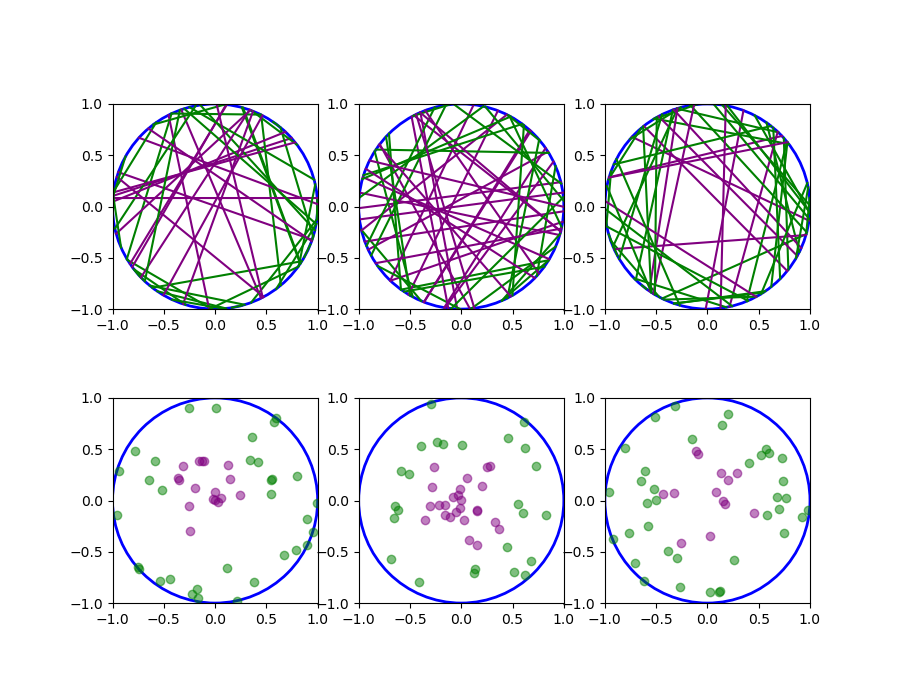

In [43]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches



fig, axes = plt.subplots(2, 3, figsize=(9, 7),num="Парадокс Бертрана ")
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flat

ax_arr = [ax1, ax2, ax3, ax4, ax5, ax6 ]


def init():
    for ax in ax_arr:
        ax.clear()

        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_aspect('equal') 
        ax.set_autoscale_on(False)


    center_x = 0
    center_y = .0
    radius = 1
    

    for ax in ax_arr:
        circle = patches.Circle((center_x, center_y), radius, 
                               color='blue', fill=False, linewidth=2)
        ax.add_patch(circle)
    

def animate(B):
    
    mids = [[],[],[]]
    
    for i, ax in enumerate(ax_arr):
      
        if i < 3:
            for re in range(bathes):
                if i == 0:
                    m = ex1(ax)
                    mids[i].append(m)
                elif i == 1:
                    m = ex2(ax)
                    mids[i].append(m)
                    pass
                elif i == 2:
                    m = ex3(ax)
                    mids[i].append(m)
        else:
            if i == 3:
                m = mids[0]
                for p in m:
                    ax.scatter(p[0],p[1],color=p[2],alpha=0.5)
            elif i == 4:
                m = mids[1]
                for p in m:
                    ax.scatter(p[0],p[1],color=p[2],alpha=0.5)
            elif i == 5:
                m = mids[2]
                for p in m:
                    ax.scatter(p[0],p[1],color=p[2],alpha=0.5)
        
    return []



In [44]:
#ЗАПУСК ВИЗУАЛИЗАЦИИ ЗДЕСЬ

steps = 50 #количество итераций
bathes = 1 #количество хорд, которые будут нарисованы за одну итерацию

ani = FuncAnimation(fig, animate, steps, init_func=init, interval=250, blit=True,repeat=False)
plt.show()

<b>Вывод:</b> как видим, результаты эксперимента вполне совпадают с теоретическими оценками.

Ссылка на видео-демонстрацию на случай, если по какой-то причине не удалось запустить ноутбук:https://youtu.be/W7Fk4DTBK2k